<a href="https://colab.research.google.com/github/jetowgood/Analysis-of-Alcohol-Sales-in-Iowa/blob/main/EDA_%26_Methodology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD DATA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
alcohol_path = "/content/drive/My Drive/ASU/DAT 490 Capstone/iowa_compressed.csv"
income_path = "/content/drive/My Drive/ASU/DAT 490 Capstone/iowa_income.csv"
population_path = "/content/drive/My Drive/ASU/DAT 490 Capstone/iowa_population.csv"

In [3]:
# import libraries
import pandas as pd
import geopandas as gpd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# create dataframe for liquor sales, income, population size
df_alcohol = pd.read_csv(alcohol_path)
df_income = pd.read_csv(income_path, header = 1)
df_population = pd.read_csv(population_path, header = 1)

# EXPLORATORY DATA ANALYSIS

## DATA WRANGLING/MUNGING/CLEANING

### Income Dataset

In [5]:
df_income.head()

,Unnamed: 0,2018-2022,2014-2018,2010-2014
0,County Name,Estimate,Estimate,Estimate
1,Adair,"$63,172","$51,859","$47,264"
2,Adams,"$64,750","$49,229","$47,335"
3,Allamakee,"$64,049","$51,057","$47,886"
4,Appanoose,"$50,684","$41,111","$41,525"


In [6]:
# drop first row in dataframe, rename 'County' column, reset indexes
df_income.drop(0, inplace = True)
df_income.rename(columns={"Unnamed: 0": "County"}, inplace = True)
df_income.rename(columns={"2018-2022": "Income: 2018-2022($)"}, inplace = True)
df_income.rename(columns={"2014-2018": "Income: 2014-2018($)"}, inplace = True)
df_income.rename(columns={"2010-2014": "Income: 2010-2014($)"}, inplace = True)

df_income.reset_index(drop = True, inplace = True)
df_income.head()

# change case spelling
df_income['County'] = df_income['County'].str.upper()

In [7]:
# data info, dtype of each column
# some columns have missing values
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   County                99 non-null     object
 1   Income: 2018-2022($)  99 non-null     object
 2   Income: 2014-2018($)  99 non-null     object
 3   Income: 2010-2014($)  99 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


In [8]:
# change columns to string dtypes
df_income = df_income.convert_dtypes()
# get rid of '$' and ',' within income columns
income_cols = ['Income: 2018-2022($)', 'Income: 2014-2018($)', 'Income: 2010-2014($)']
df_income[income_cols] = df_income[income_cols].replace({'\$':'', ',':''}, regex = True)
# change income columns from strings to numeric
df_income[income_cols] = df_income[income_cols].apply(pd.to_numeric)

df_income.head()


,County,Income: 2018-2022($),Income: 2014-2018($),Income: 2010-2014($)
0,ADAIR,63172,51859,47264
1,ADAMS,64750,49229,47335
2,ALLAMAKEE,64049,51057,47886
3,APPANOOSE,50684,41111,41525
4,AUDUBON,54973,50397,47556


In [9]:
# Average income in each county from 2010-2022
avg_income = df_income[['Income: 2018-2022($)', 'Income: 2014-2018($)', 'Income: 2010-2014($)']].mean(axis=1)

# add average income column to income df
df_income.insert(4, 'Average Income ($)', round(avg_income, 0))

df_income.head()

,County,Income: 2018-2022($),Income: 2014-2018($),Income: 2010-2014($),Average Income ($)
0,ADAIR,63172,51859,47264,54098.0
1,ADAMS,64750,49229,47335,53771.0
2,ALLAMAKEE,64049,51057,47886,54331.0
3,APPANOOSE,50684,41111,41525,44440.0
4,AUDUBON,54973,50397,47556,50975.0


In [10]:
# reset income dataframe index
df_income.reset_index(drop = True)

df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   County                99 non-null     string 
 1   Income: 2018-2022($)  99 non-null     Int64  
 2   Income: 2014-2018($)  99 non-null     Int64  
 3   Income: 2010-2014($)  99 non-null     Int64  
 4   Average Income ($)    99 non-null     Float64
dtypes: Float64(1), Int64(3), string(1)
memory usage: 4.4 KB


In [11]:
df_income.shape

(99, 5)

### Population Dataset

In [12]:
df_population.head()

,County Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Adair,"7,679","7,546","7,468","7,387","7,368","7,145","7,005","7,051","7,074","7,152","7,493","7,524","7,457","7,389"
1,Adams,"4,023","3,994","3,910","3,891","3,877","3,754","3,692","3,657","3,644","3,602","3,709","3,638","3,601","3,544"
2,Allamakee,"14,378","14,222","14,149","14,071","14,062","13,874","13,851","13,803","13,852","13,687","14,071","13,968","14,018","14,074"
3,Appanoose,"12,856","12,848","12,707","12,654","12,671","12,577","12,505","12,353","12,401","12,426","12,287","12,269","12,141","12,119"
4,Audubon,"6,098","6,004","5,865","5,863","5,771","5,711","5,626","5,550","5,471","5,496","5,683","5,645","5,575","5,534"


In [13]:
# data info, dtype of each column
# some columns have missing values
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   County Name  99 non-null     object
 1   2010         99 non-null     object
 2   2011         99 non-null     object
 3   2012         99 non-null     object
 4   2013         99 non-null     object
 5   2014         99 non-null     object
 6   2015         99 non-null     object
 7   2016         99 non-null     object
 8   2017         99 non-null     object
 9   2018         99 non-null     object
 10  2019         99 non-null     object
 11  2020         99 non-null     object
 12  2021         99 non-null     object
 13  2022         99 non-null     object
 14  2023         99 non-null     object
dtypes: object(15)
memory usage: 11.7+ KB


In [14]:
# rename county column to match
df_population.rename(columns={'County Name': 'County'}, inplace = True)

df_population['County'] = df_population['County'].str.upper()

# # change dtypes from string
df_population = df_population.convert_dtypes()
# change population columns into numeric
pop_cols = df_population.columns[1:]
df_population[pop_cols] = df_population[pop_cols].replace({',':''}, regex = True)
df_population[pop_cols] = df_population[pop_cols].apply(pd.to_numeric)

df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   County  99 non-null     string
 1   2010    99 non-null     Int64 
 2   2011    99 non-null     Int64 
 3   2012    99 non-null     Int64 
 4   2013    99 non-null     Int64 
 5   2014    99 non-null     Int64 
 6   2015    99 non-null     Int64 
 7   2016    99 non-null     Int64 
 8   2017    99 non-null     Int64 
 9   2018    99 non-null     Int64 
 10  2019    99 non-null     Int64 
 11  2020    99 non-null     Int64 
 12  2021    99 non-null     Int64 
 13  2022    99 non-null     Int64 
 14  2023    99 non-null     Int64 
dtypes: Int64(14), string(1)
memory usage: 13.1 KB


In [15]:
# find average population
avg_pop = df_population.iloc[:, 1:].mean(axis=1)

# add column to population df
df_population.insert(1, 'Average Population', round(avg_pop, 0))

df_population.head()

,County,Average Population,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ADAIR,7338.0,7679,7546,7468,7387,7368,7145,7005,7051,7074,7152,7493,7524,7457,7389
1,ADAMS,3753.0,4023,3994,3910,3891,3877,3754,3692,3657,3644,3602,3709,3638,3601,3544
2,ALLAMAKEE,14006.0,14378,14222,14149,14071,14062,13874,13851,13803,13852,13687,14071,13968,14018,14074
3,APPANOOSE,12487.0,12856,12848,12707,12654,12671,12577,12505,12353,12401,12426,12287,12269,12141,12119
4,AUDUBON,5707.0,6098,6004,5865,5863,5771,5711,5626,5550,5471,5496,5683,5645,5575,5534


In [16]:
df_population.shape

(99, 16)

### Alcohol Sales Dataset

In [17]:
df_alcohol.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-15941000030,11/28/2018,2536,HY-VEE / PLEASANT HILL,4815 MAPLE DRIVE,PLEASANT HILL,50317.0,POINT (-93.519187 41.598109),77.0,POLK,...,26586,GENTLEMAN JACK,12,750,20.01,30.02,2,60.04,1.50,0.39
1,INV-72674800099,07/29/2024,10165,SUPER MARKET / DAVENPORT,6723 NORTHWEST BOULEVARD,DAVENPORT,52806,POINT (-90.608956036 41.589559983),NaN,SCOTT,...,80365,OLE SMOKY WHITE CHOCOLATE STRAWBERRY CREAM,6,750,13.00,19.50,1,19.50,0.75,0.19
2,INV-23115800035,11/08/2019,5851,CASEY'S GENERAL STORE #74 - MORNING SUN,618 S CHURCH STREET,MORNING SUN,52640,POINT (-91.254443 41.089418),58.0,LOUISA,...,64858,FIREBALL CINNAMON WHISKEY MINI DISPENSER,1,50,30.00,45.00,1,45.00,0.05,0.01
3,S18074600012,03/25/2014,4490,CASEY'S GENERAL STORE #2766 / CEDAR,380 33RD AVE SW,CEDAR RAPIDS,52404,POINT (-91.67222100000001 41.944954),57.0,LINN,...,26826,JACK DANIELS OLD #7 BLACK LBL,12,750,14.04,21.05,3,63.15,2.25,0.59
4,INV-29537400055,08/18/2020,2535,HY-VEE FOOD STORE #1 / WDM,1700 VALLEY WEST DR,WEST DES MOINES,50265.0,NaN,77.0,POLK,...,88296,PATRON SILVER,12,750,27.50,41.25,1,41.25,0.75,0.19


In [18]:
# data info, dtype of each column
# some columns have missing values
df_alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Invoice/Item Number    500000 non-null  object 
 1   Date                   500000 non-null  object 
 2   Store Number           500000 non-null  int64  
 3   Store Name             500000 non-null  object 
 4   Address                498607 non-null  object 
 5   City                   498607 non-null  object 
 6   Zip Code               498606 non-null  object 
 7   Store Location         458648 non-null  object 
 8   County Number          403838 non-null  float64
 9   County                 497361 non-null  object 
 10  Category               499717 non-null  float64
 11  Category Name          499575 non-null  object 
 12  Vendor Number          500000 non-null  float64
 13  Vendor Name            500000 non-null  object 
 14  Item Number            500000 non-nu

In [19]:
# drop data columns
drop_columns = ['Store Name', 'Address', 'City', 'Zip Code',
                'Store Location', 'County Number', 'Vendor Number',
                'Vendor Name', 'Pack', 'Bottle Volume (ml)',
                'Volume Sold (Gallons)', 'Category', 'Invoice/Item Number',
                'Item Number']
df_alcohol.drop(drop_columns, axis=1, inplace=True)

# checking for missing values
print(df_alcohol.isna().sum())

Date                       0
Store Number               0
County                  2639
Category Name            425
Item Description           0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sale (Dollars)             0
Volume Sold (Liters)       0
dtype: int64


In [20]:
# drop na/null values
df_alcohol.dropna(inplace=True)
print(df_alcohol.isna().sum())

print(df_alcohol.shape)

Date                    0
Store Number            0
County                  0
Category Name           0
Item Description        0
State Bottle Cost       0
State Bottle Retail     0
Bottles Sold            0
Sale (Dollars)          0
Volume Sold (Liters)    0
dtype: int64
(496944, 10)


In [21]:
# change date format to month and year
df_alcohol['Date'] = pd.to_datetime(df_alcohol['Date'])
df_alcohol['Month'] = df_alcohol['Date'].dt.month
df_alcohol['Year'] = df_alcohol['Date'].dt.year


df_alcohol.head()

,Date,Store Number,County,Category Name,Item Description,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Month,Year
0,2018-11-28,2536,POLK,TENNESSEE WHISKIES,GENTLEMAN JACK,20.01,30.02,2,60.04,1.50,11,2018
1,2024-07-29,10165,SCOTT,NEUTRAL GRAIN SPIRITS FLAVORED,OLE SMOKY WHITE CHOCOLATE STRAWBERRY CREAM,13.00,19.50,1,19.50,0.75,7,2024
2,2019-11-08,5851,LOUISA,WHISKEY LIQUEUR,FIREBALL CINNAMON WHISKEY MINI DISPENSER,30.00,45.00,1,45.00,0.05,11,2019
3,2014-03-25,4490,LINN,TENNESSEE WHISKIES,JACK DANIELS OLD #7 BLACK LBL,14.04,21.05,3,63.15,2.25,3,2014
4,2020-08-18,2535,POLK,100% AGAVE TEQUILA,PATRON SILVER,27.50,41.25,1,41.25,0.75,8,2020


### Merged Dataset

In [22]:
# merge income and population
df_merged = pd.merge(df_income, df_population, on='County', how='inner')

df_merged.columns

Index(['County', 'Income: 2018-2022($)', 'Income: 2014-2018($)',
       'Income: 2010-2014($)', 'Average Income ($)', 'Average Population',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [23]:
# drop columns
drop_merged_columns = ['Income: 2018-2022($)', 'Income: 2014-2018($)',
       'Income: 2010-2014($)', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
df_merged.drop(drop_merged_columns, axis=1, inplace=True)

df_merged.head()

,County,Average Income ($),Average Population
0,ADAIR,54098.0,7338.0
1,ADAMS,53771.0,3753.0
2,ALLAMAKEE,54331.0,14006.0
3,APPANOOSE,44440.0,12487.0
4,AUDUBON,50975.0,5707.0


In [25]:
# merge final df
# aggregate df_alcohol by County
df_alcohol_agg = df_alcohol.groupby('County', as_index=False).agg({
    'Sale (Dollars)': 'sum',  # Sum up sales
    'Volume Sold (Liters)': 'sum'  # Sum up volume sold
})

df_merged = pd.merge(df_merged, df_alcohol_agg, on='County', how='left')

df_merged.head()

,County,Average Income ($),Average Population,Sale (Dollars),Volume Sold (Liters)
0,ADAIR,54098.0,7338.0,100061.16,7113.22
1,ADAMS,53771.0,3753.0,30519.67,1883.84
2,ALLAMAKEE,54331.0,14006.0,187597.37,14159.69
3,APPANOOSE,44440.0,12487.0,201434.89,13905.31
4,AUDUBON,50975.0,5707.0,39951.18,3120.80


In [27]:
# create per capita columns
df_merged['Sale Per Capita ($)'] = df_alcohol_agg['Sale (Dollars)'] / df_merged['Average Population']
df_merged['Volume Per Capita (Liters)'] = df_alcohol_agg['Volume Sold (Liters)'] / df_merged['Average Population']

df_merged

,County,Average Income ($),Average Population,Sale (Dollars),Volume Sold (Liters),Sale Per Capita ($),Volume Per Capita (Liters)
0,ADAIR,54098.0,7338.0,100061.16,7113.22,13.636026,0.969368
1,ADAMS,53771.0,3753.0,30519.67,1883.84,8.132073,0.501956
2,ALLAMAKEE,54331.0,14006.0,187597.37,14159.69,13.394072,1.010973
3,APPANOOSE,44440.0,12487.0,201434.89,13905.31,16.131568,1.113583
4,AUDUBON,50975.0,5707.0,39951.18,3120.80,7.000382,0.546837
...,...,...,...,...,...,...,...
94,WINNEBAGO,54354.0,10595.0,174893.39,13612.39,72.441843,4.650321
95,WINNESHIEK,61442.0,20408.0,335685.54,23221.89,8.569845,0.667012
96,WOODBURY,56632.0,103436.0,2592572.34,157409.36,3.245345,0.224505
97,WORTH,58068.0,7452.0,73861.78,5370.33,347.90289,21.123103


In [28]:
# make copies of merged dataframe
df_merged_geospatial = df_merged.copy()
df_merged_percapita = df_merged.copy()

## SINGLE VARIABLE ANALYSIS

### Income Dataset

In [29]:
# summary statistics
df_income.describe()

,Income: 2018-2022($),Income: 2014-2018($),Income: 2010-2014($),Average Income ($)
count,99.0,99.0,99.0,99.0
mean,67479.868687,55159.929293,50012.676768,57550.848485
std,8346.173868,7030.036922,6041.404263,6845.301501
min,50684.0,41111.0,38275.0,44440.0
25%,62271.5,50301.5,45706.0,53429.5
50%,66056.0,54070.0,48998.0,56490.0
75%,72617.0,58478.0,53458.0,61239.0
max,99533.0,84790.0,74876.0,86400.0


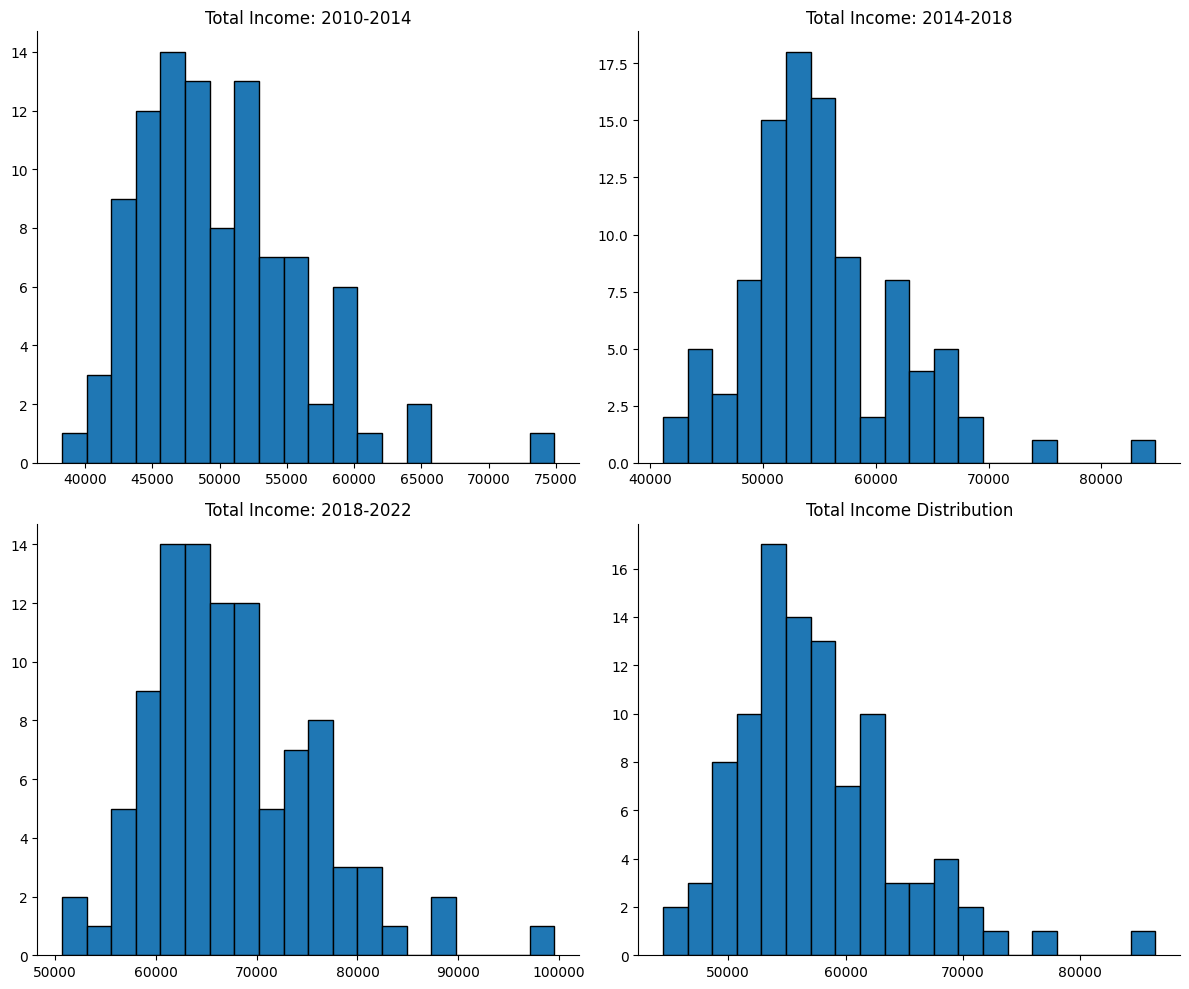

In [30]:
# HISTOGRAM - Average Total Income
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 2010-2014
axes[0, 0].hist(df_income['Income: 2010-2014($)'], bins=20, edgecolor='black')
axes[0, 0].set_title('Total Income: 2010-2014')
axes[0, 0].spines[['top', 'right']].set_visible(False)

# 2014-2018
axes[0, 1].hist(df_income['Income: 2014-2018($)'], bins=20, edgecolor='black')
axes[0, 1].set_title('Total Income: 2014-2018')
axes[0, 1].spines[['top', 'right']].set_visible(False)

# 2018-2022
axes[1, 0].hist(df_income['Income: 2018-2022($)'], bins=20, edgecolor='black')
axes[1, 0].set_title('Total Income: 2018-2022')
axes[1, 0].spines[['top', 'right']].set_visible(False)

# Average Income
axes[1, 1].hist(df_income['Average Income ($)'], bins=20, edgecolor='black')
axes[1, 1].set_title('Total Income Distribution')
axes[1, 1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

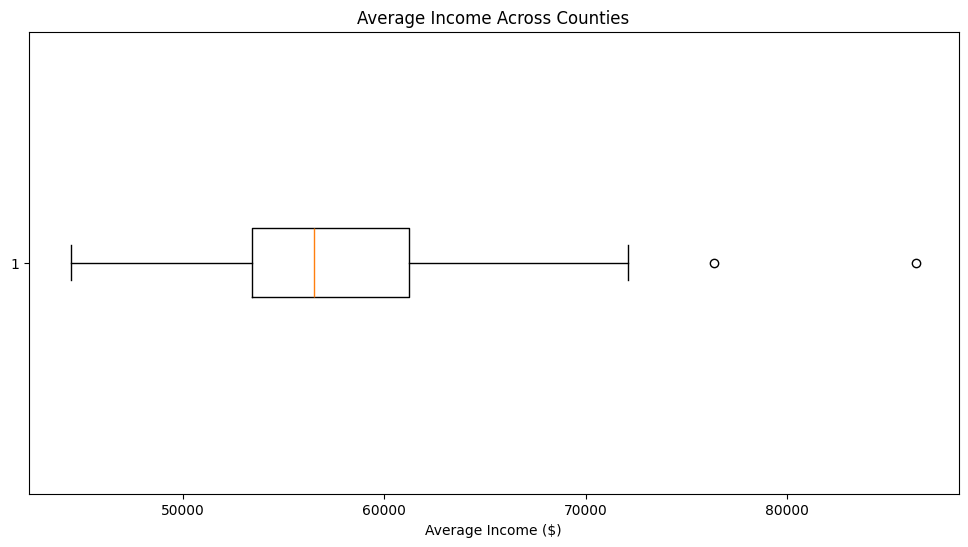

In [31]:
# BOXPLOT - Average Income Across Counties

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.boxplot(df_merged['Average Income ($)'], vert=False)
plt.xlabel('Average Income ($)')
_ = plt.title('Average Income Across Counties')

### Population Dataset

In [32]:
# summary statistics
df_population.describe()

,Average Population,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
mean,31665.767677,30815.606061,30973.090909,31072.626263,31242.393939,31407.575758,31524.848485,31630.010101,31732.828283,31804.222222,31869.393939,32231.353535,32302.464646,32320.131313,32393.979798
std,57435.444497,53062.204731,53804.004966,54455.755016,55301.562665,56151.603959,56848.815157,57543.990884,58184.620578,58709.272294,59149.199608,59726.88513,60150.389274,60453.199198,60870.248779
min,3753.0,4023.0,3994.0,3910.0,3891.0,3877.0,3754.0,3692.0,3657.0,3644.0,3602.0,3709.0,3638.0,3601.0,3544.0
25%,10049.0,10431.0,10310.0,10294.0,10183.5,10165.5,10057.5,9970.0,9957.5,9836.0,9819.0,9951.0,9898.5,9804.0,9819.0
50%,15390.0,15739.0,15740.0,15641.0,15483.0,15483.0,15462.0,15329.0,15213.0,15229.0,15109.0,15190.0,15220.0,15176.0,15014.0
75%,25003.5,24635.0,24599.5,24663.0,24755.0,24790.5,24822.5,24963.5,24941.5,24982.5,25119.5,25280.0,25424.5,25488.0,25514.5
max,473191.0,432352.0,438737.0,444671.0,452657.0,460898.0,467304.0,474277.0,480487.0,485833.0,490161.0,493022.0,497842.0,501184.0,505255.0


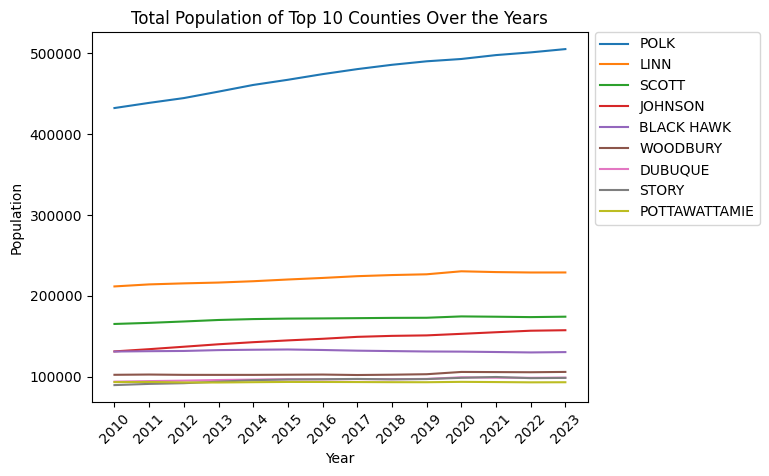

In [33]:
# LINE PLOT - Total Population of Top 10 Counties
# sort df so largest avg population counties are at the top
sorted_pop = df_population.sort_values(by= 'Average Population', ascending=False)

# plot population for top 10 counties across the years
years = sorted_pop.columns[2:]
plt.plot(years, sorted_pop.iloc[0:9, 2:].T)
plt.legend(sorted_pop.iloc[0:9, 0], bbox_to_anchor = (1, 1.02))
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Total Population of Top 10 Counties Over the Years')
plt.xticks(rotation = 45)
plt.show()

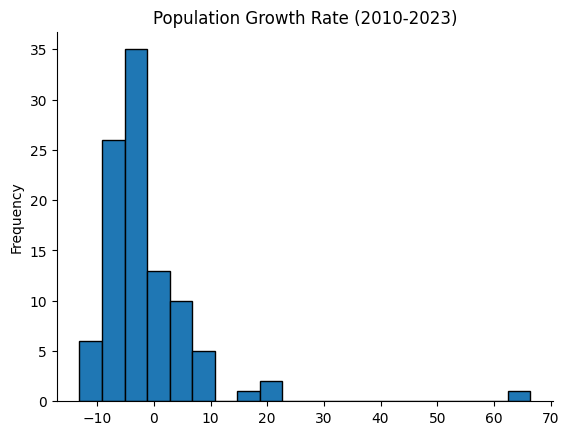

In [34]:
# HISTORGRAM - Population Growth Rate
# Calculate population growth from 2010 to 2023
df_population['Growth_Rate'] = ((df_population['2023'] - df_population['2010']) / df_population['2010']) * 100

# Plot distribution of growth rates
df_population['Growth_Rate'].plot(kind='hist', bins=20, edgecolor='black', title='Population Growth Rate (2010-2023)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


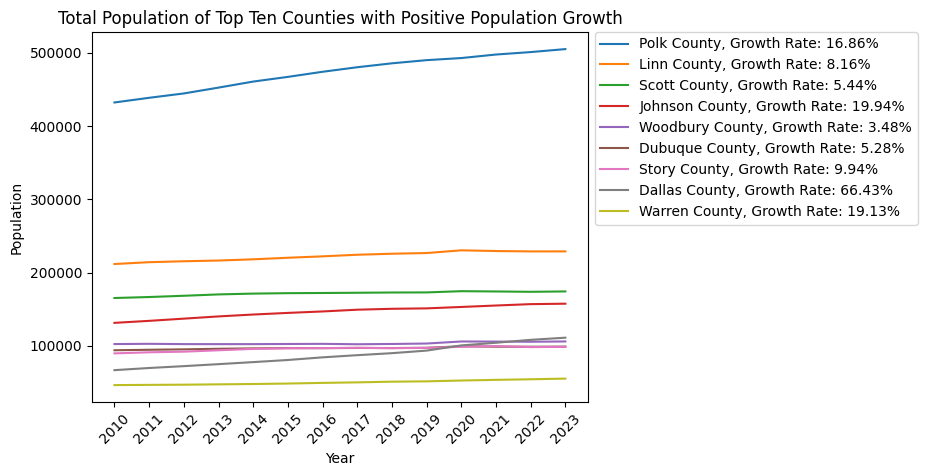

In [35]:
# LINE PLOT - Total Population, focusing on top ten counties with positive growth rate
# population growth rate by county - line plot
df_population['Growth_Rate'] = ((df_population['2023'] - df_population['2010']) / df_population['2010']) * 100
inc_population = df_population[df_population['Growth_Rate'] > 0]
inc_population = inc_population.sort_values(by='Average Population', ascending=False)
years = inc_population.columns[2:16]
legend_labels = inc_population.iloc[0:9, 0].str.title() + ' County, Growth Rate: ' + np.round(inc_population.iloc[0:9, 16], 2).astype(str) + '%'

# line plot of population for counties with population growth
plt.plot(years, inc_population.iloc[0:9,2:16].T)
plt.legend(legend_labels, bbox_to_anchor = (1, 1.02))
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Total Population of Top Ten Counties with Positive Population Growth')
plt.xticks(rotation = 45)
plt.show()

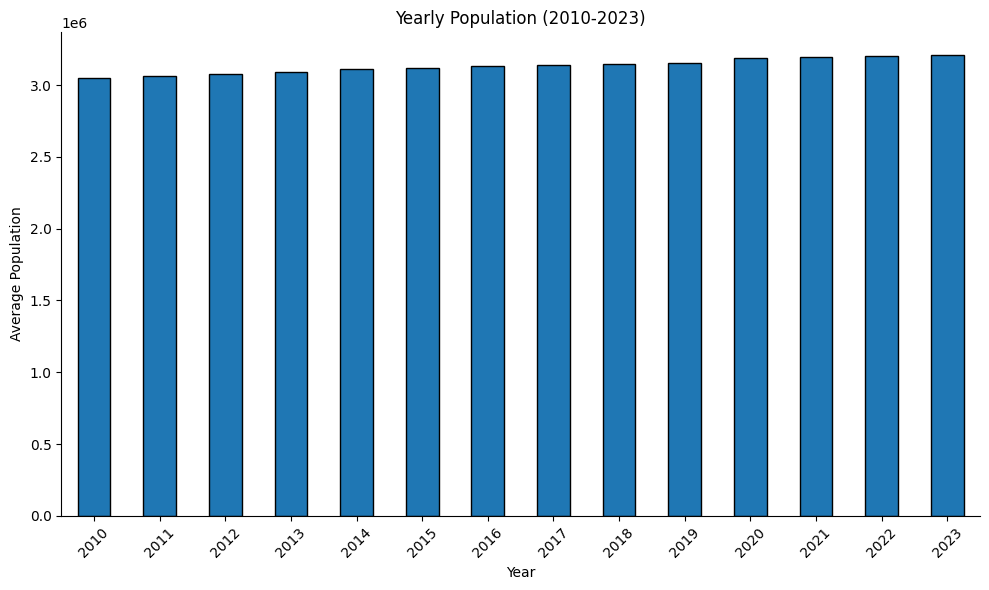

2010    3050745
2011    3066336
2012    3076190
2013    3092997
2014    3109350
2015    3120960
2016    3131371
2017    3141550
2018    3148618
2019    3155070
2020    3190904
2021    3197944
2022    3199693
2023    3207004
dtype: Int64


In [36]:
# BAR PLOT - Average Yearly Population in Iowa
# Calculate the yearly average population for each year
yearly_pop_averages = df_population.loc[:, '2010':'2023'].sum(axis=0)

plt.figure(figsize=(10, 6))
yearly_pop_averages.plot(kind='bar', edgecolor='black', title='Yearly Population (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Average Population')
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

print(yearly_pop_averages)

### Alcohol Dataset

In [37]:
# summary statistics
df_alcohol.describe()

,Date,Store Number,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Month,Year
count,496944,496944.000000,496944.000000,496944.000000,496944.000000,496944.000000,496944.000000,496944.000000,496944.000000
mean,2018-08-31 02:44:03.929296128,3934.073083,10.760277,16.149670,10.817219,145.343607,9.089472,6.570145,2018.160418
min,2012-01-03 00:00:00,2106.000000,0.000000,0.000000,-648.000000,-4801.680000,-648.000000,1.000000,2012.000000
25%,2015-07-22 00:00:00,2622.000000,5.750000,8.630000,3.000000,35.920000,1.500000,4.000000,2015.000000
50%,2018-11-14 00:00:00,3901.000000,8.500000,12.750000,6.000000,77.400000,4.800000,7.000000,2018.000000
75%,2021-10-26 00:00:00,4829.000000,13.000000,19.500000,12.000000,148.680000,10.500000,10.000000,2021.000000
max,2024-08-30 00:00:00,10464.000000,2000.000000,3000.000000,3072.000000,51327.000000,5376.000000,12.000000,2024.000000
std,NaN,1336.308348,10.278611,15.415264,27.879792,465.194182,33.961061,3.422131,3.646704


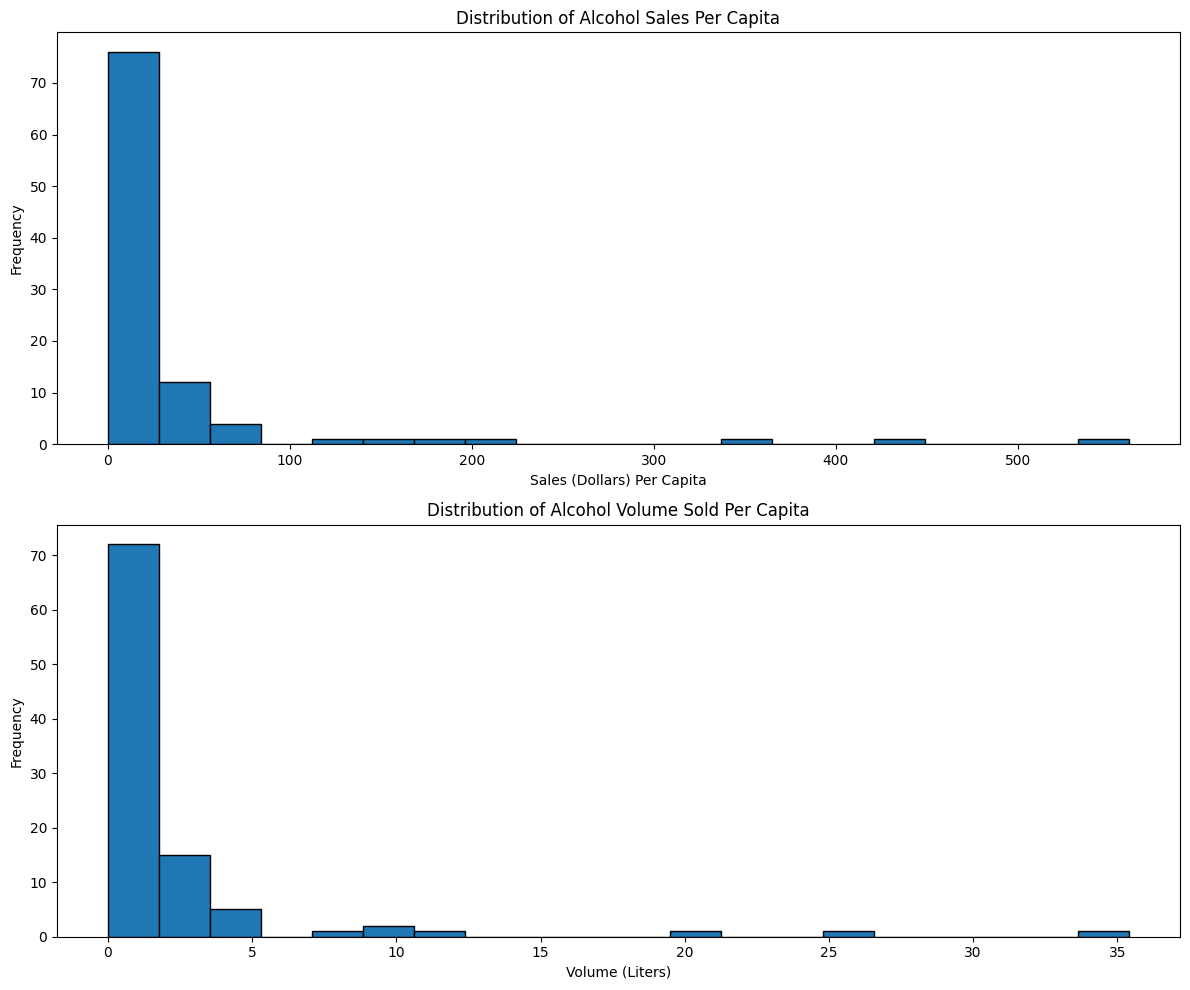

In [38]:
# HISTORGRAM - alcohol sales per capita + volume sold per capita
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot histogram for sales per capita
df_merged['Sale Per Capita ($)'].plot(kind='hist', bins=20, edgecolor='black',
                          title='Distribution of Alcohol Sales Per Capita', ax=axes[0])
axes[0].set_xlabel('Sales (Dollars) Per Capita')
axes[0].set_ylabel('Frequency')

# Plot a histogram for volume per capita
df_merged['Volume Per Capita (Liters)'].plot(kind='hist', bins=20, edgecolor='black',
                          title='Distribution of Alcohol Volume Sold Per Capita', ax=axes[1])
axes[1].set_xlabel('Volume (Liters)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


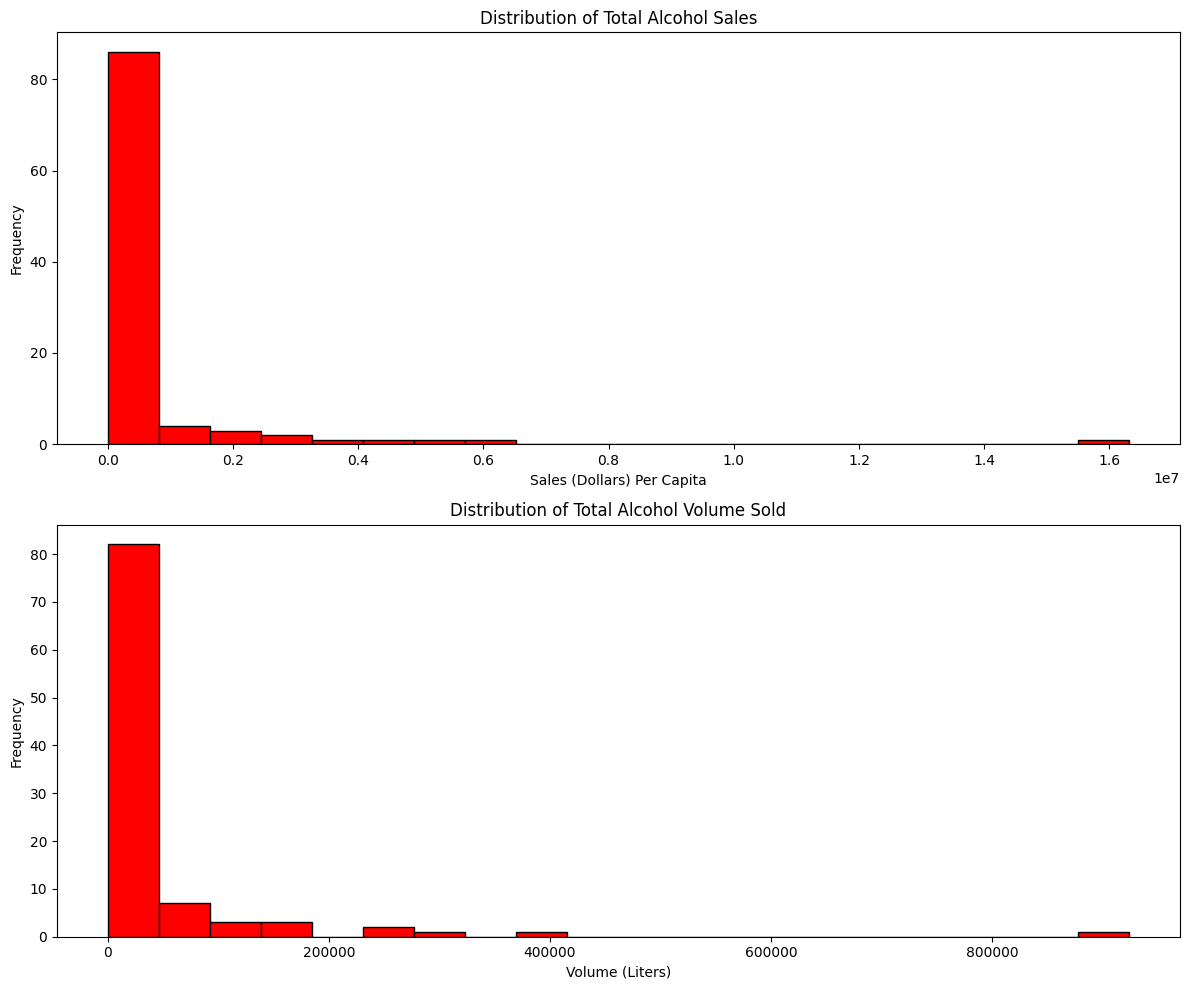

In [39]:
# HISTOGRAM - total sales + total volume sold
# histogram plots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot histogram for sales per capita
df_alcohol_agg['Sale (Dollars)'].plot(kind='hist', bins=20, color='red', edgecolor='black',
                          title='Distribution of Total Alcohol Sales', ax=axes[0])
axes[0].set_xlabel('Sales (Dollars) Per Capita')
axes[0].set_ylabel('Frequency')

# Plot a histogram for volume per capita
df_alcohol_agg['Volume Sold (Liters)'].plot(kind='hist', bins=20, color='red', edgecolor='black',
                          title='Distribution of Total Alcohol Volume Sold', ax=axes[1])
axes[1].set_xlabel('Volume (Liters)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
## calculate sales per capita and volume sold per capita, but by year?

# group sales and volume sold by county, then year
df_temp = df_alcohol[['Year', 'County', 'Sale (Dollars)', 'Volume Sold (Liters)']]

df_temp_percapita = df_temp.groupby(['County', 'Year']).sum().reset_index()

# merge in average population
df_temp_percapita = df_temp_percapita.merge(df_population[['County', 'Average Population']], on='County', how='left')

# calculate 'sales per capita' column
df_temp_percapita['Sales Per Capita'] = df_temp_percapita['Sale (Dollars)'] / df_temp_percapita['Average Population']

# calculate 'volume per capita' column
df_temp_percapita['Volume Per Capita'] = df_temp_percapita['Volume Sold (Liters)'] / df_temp_percapita['Average Population']

# final results
df_temp_percapita.head()

,County,Year,Sale (Dollars),Volume Sold (Liters),Average Population,Sales Per Capita,Volume Per Capita
0,ADAIR,2012,8729.76,715.05,7338.0,1.189665,0.097445
1,ADAIR,2013,5507.37,436.35,7338.0,0.750527,0.059464
2,ADAIR,2014,7963.57,630.50,7338.0,1.085251,0.085923
3,ADAIR,2015,7479.68,658.72,7338.0,1.019308,0.089768
4,ADAIR,2016,6983.57,539.66,7338.0,0.951699,0.073543


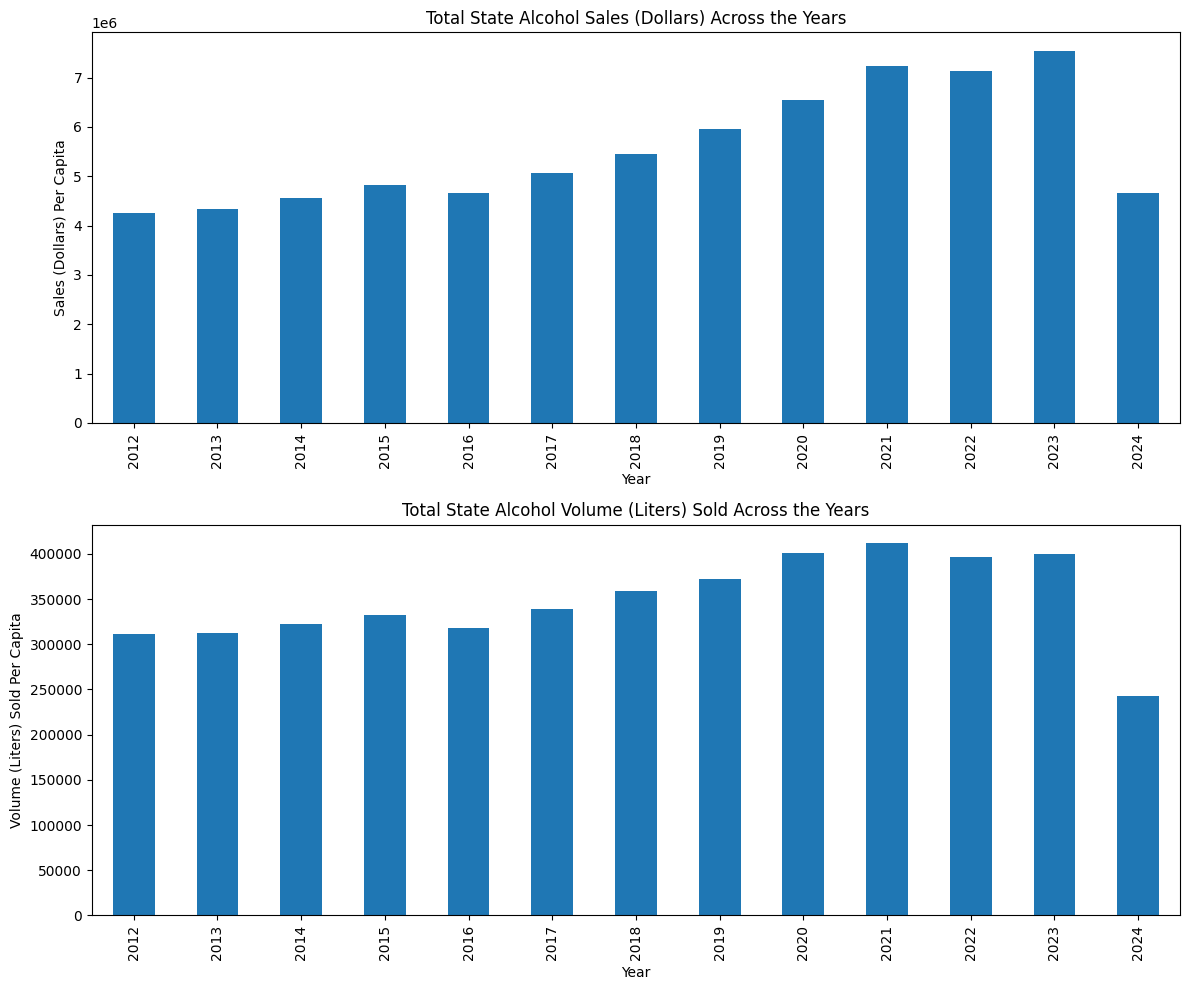

In [41]:
# BAR PLOTS - total alcohol sales and total volume sold by year
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Total alcohol sales (dollars) over the years
df_temp_percapita.groupby('Year')['Sale (Dollars)'].sum().plot(kind='bar',
                    title='Total State Alcohol Sales (Dollars) Across the Years', ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Sales (Dollars) Per Capita')

# Total alcohol volume sold (liters) over the years
df_temp_percapita.groupby('Year')['Volume Sold (Liters)'].sum().plot(kind='bar',
                   title='Total State Alcohol Volume (Liters) Sold Across the Years', ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Volume (Liters) Sold Per Capita')

plt.tight_layout()
plt.show()

## VARIABLE RELATIONSHIP ANALYSIS

### Alcohol Sales vs Population

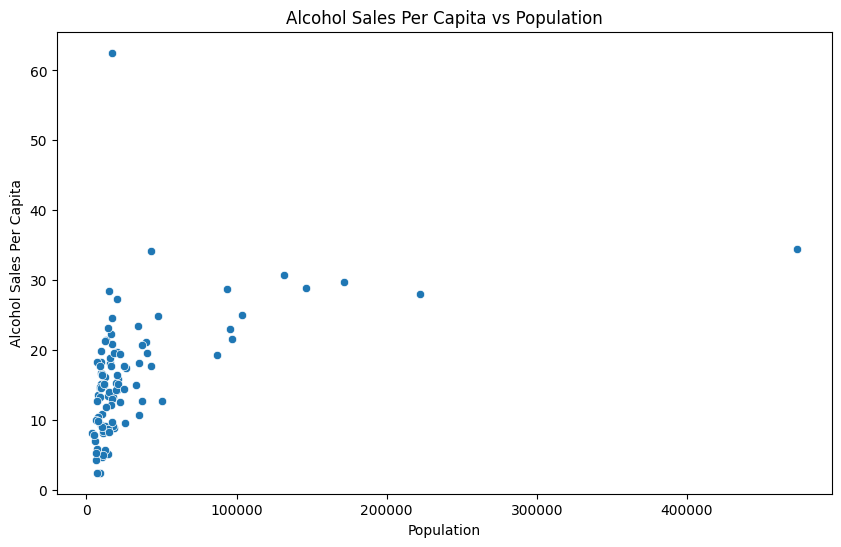

Correlation between Alcohol Sales Per Capita and Population: 0.46


In [42]:
# SCATTERPLOT - alcohol sales per capita  VS population
non_year_columns = [col for col in df_population.columns if not col.isdigit()]

# Melt the DataFrame
df_population_melted = pd.melt(df_population, id_vars=non_year_columns, var_name='Year', value_name='Population')
# Convert Year column to integer
df_population_melted['Year'] = df_population_melted['Year'].astype(int)
df_population_avg = df_population_melted.groupby('County')['Population'].mean().reset_index()
df_alcohol_sum = df_alcohol.groupby('County')['Sale (Dollars)'].sum().reset_index()

df_population_avg['County'] = df_population_avg['County'].str.lower()
df_alcohol_sum['County'] = df_alcohol_sum['County'].str.lower()

df_merged = df_population_avg.merge(df_alcohol_sum, on='County', how='inner')

# calcukatr sales per capita
df_merged['Sales Per Capita'] = df_merged['Sale (Dollars)'] / df_merged['Population']

# scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='Sales Per Capita', data=df_merged)
plt.title('Alcohol Sales Per Capita vs Population')
plt.xlabel('Population')
plt.ylabel('Alcohol Sales Per Capita')
plt.show()

# compute correlation coefficients
correlation = df_merged['Population'].corr(df_merged['Sales Per Capita'])
print(f'Correlation between Alcohol Sales Per Capita and Population: {correlation:.2f}')

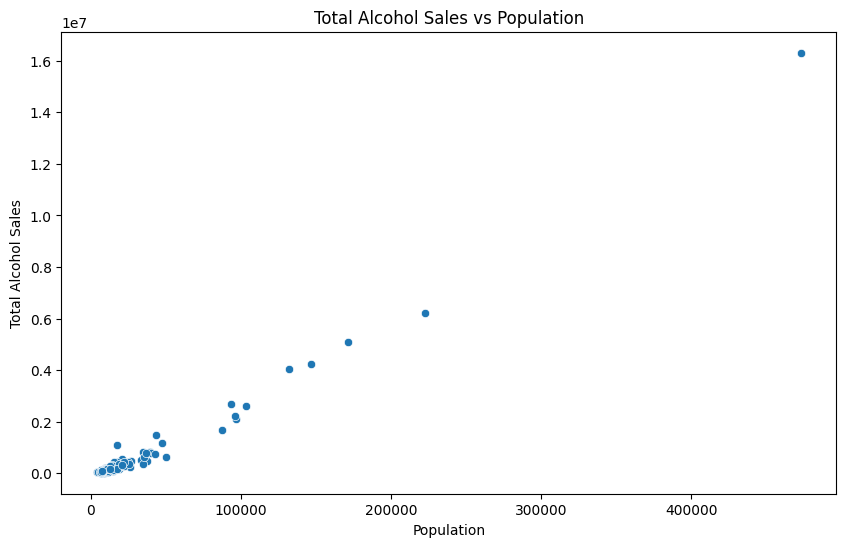

Correlation between Total Alcohol Sales and Population: 0.99


In [43]:
# SCATTERPLOT - total alcohol sales VS population


non_year_columns = [col for col in df_population.columns if not col.isdigit()]

# Melt the DataFrame
df_population_melted = pd.melt(df_population, id_vars=non_year_columns, var_name='Year', value_name='Population')
# Convert Year column to integer
df_population_melted['Year'] = df_population_melted['Year'].astype(int)
df_population_avg = df_population_melted.groupby('County')['Population'].mean().reset_index()
df_alcohol_sum = df_alcohol.groupby('County')['Sale (Dollars)'].sum().reset_index()

df_population_avg['County'] = df_population_avg['County'].str.lower()
df_alcohol_sum['County'] = df_alcohol_sum['County'].str.lower()

df_merged = df_population_avg.merge(df_alcohol_sum, on='County', how='inner')

# calcukate sales per capita
# df_merged['Sales Per Capita'] = df_merged['Sale (Dollars)'] / df_merged['Population']

# scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='Sale (Dollars)', data=df_merged)
plt.title('Total Alcohol Sales vs Population')
plt.xlabel('Population')
plt.ylabel('Total Alcohol Sales')
plt.show()

# compute correlation coefficients
correlation = df_merged['Population'].corr(df_merged['Sale (Dollars)'])
print(f'Correlation between Total Alcohol Sales and Population: {correlation:.2f}')

### Alcohol Sales vs Income


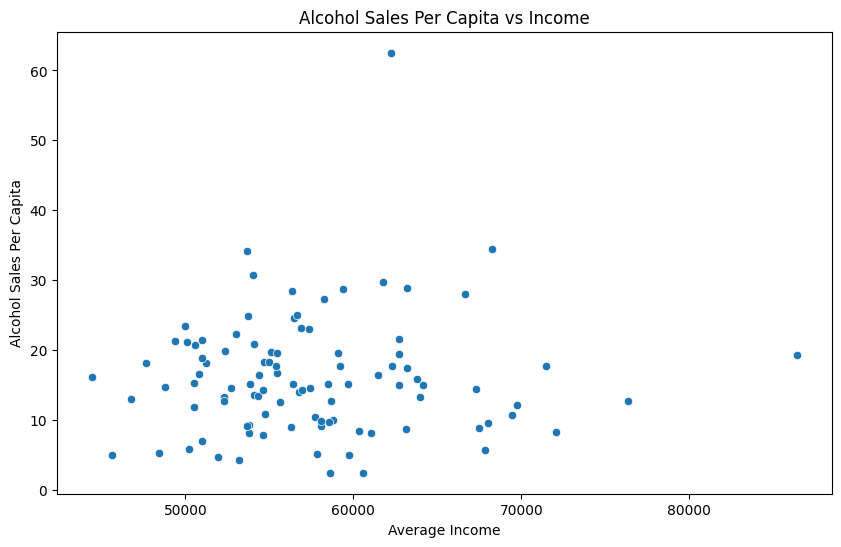

Correlation between Alcohol Sales Per Capita and Income: 0.05


In [44]:
# SCATTER PLOT - alcohol sales per capita VS income

# Prepare aggregate values
df_alcohol_sum = df_alcohol.groupby('County')['Sale (Dollars)'].sum().reset_index()
df_pop = df_population[['County', 'Average Population']].copy()

# Make sure all county names are formatted the same
df_income['County'] = df_income['County'].str.lower()
df_alcohol_sum['County'] = df_alcohol_sum['County'].str.lower()
df_pop['County'] = df_pop['County'].str.lower()

# Combine data
df_pre_merged = df_income.merge(df_alcohol_sum, on='County', how='inner')
df_merged_income = df_pre_merged.merge(df_pop, on='County', how='inner')

# Add sales per capita feature
df_merged_income['Sales Per Capita'] = df_merged_income['Sale (Dollars)'] / df_merged_income['Average Population']

# scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Income ($)', y='Sales Per Capita', data=df_merged_income)
plt.title('Alcohol Sales Per Capita vs Income')
plt.xlabel('Average Income')
plt.ylabel('Alcohol Sales Per Capita')
plt.show()

# compute correlation coefficients
corr_income_sales = df_merged_income['Average Income ($)'].corr(df_merged_income['Sales Per Capita'])
print(f'Correlation between Alcohol Sales Per Capita and Income: {corr_income_sales:.2f}')

### County vs Income

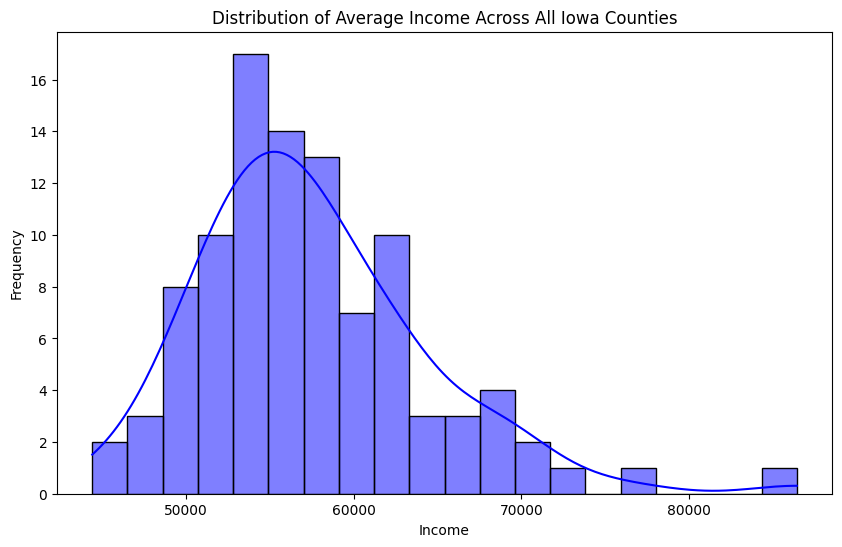

In [45]:
# HISTOGRAM - Distribution of Average Income
plt.figure(figsize=(10, 6))
sns.histplot(data=df_income, x='Average Income ($)', bins=20, kde=True, color='blue')
plt.title('Distribution of Average Income Across All Iowa Counties')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

### County vs Alcohol Sales

In [46]:
# Obtain county with highest income
df_income.loc[df_income['Average Income ($)'].idxmax()]

,24
County,dallas
Income: 2018-2022($),99533
Income: 2014-2018($),84790
Income: 2010-2014($),74876
Average Income ($),86400.0


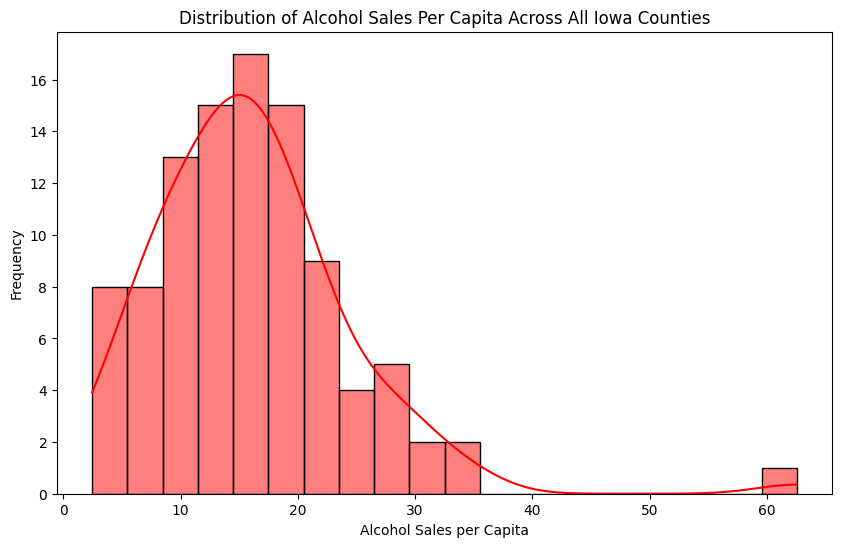

In [47]:
# HISTORGRAM -  Alcohol Sales Per Capita
plt.figure(figsize=(10, 6))
sns.histplot(data = df_merged_income, x='Sales Per Capita', bins=20, kde=True, color='red')
plt.title('Distribution of Alcohol Sales Per Capita Across All Iowa Counties')
plt.xlabel('Alcohol Sales per Capita')
plt.ylabel('Frequency')
plt.show()

In [48]:
# Obtain county with highest per capita alcohol sales
highest_per_capita_sales = df_merged_income.loc[df_merged_income['Sales Per Capita'].idxmax()]
print(highest_per_capita_sales)


County                   dickinson
Income: 2018-2022($)         72446
Income: 2014-2018($)         58099
Income: 2010-2014($)         56086
Average Income ($)         62210.0
Sale (Dollars)          1078840.43
Average Population         17253.0
Sales Per Capita         62.530599
Name: 29, dtype: object


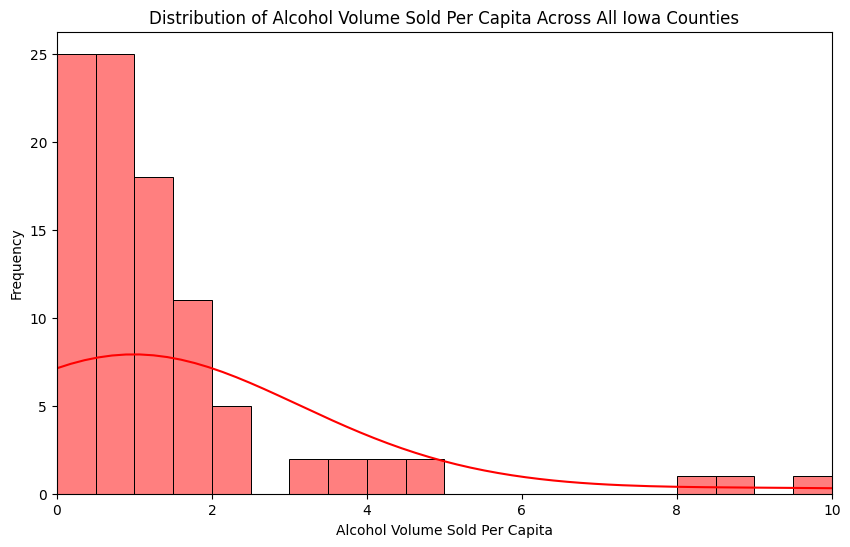

In [49]:
# HISTROGRAM - Alcohol Volume Per Capita
plt.figure(figsize=(10, 6))
sns.histplot(data = df_merged_geospatial, x='Volume Per Capita (Liters)', bins=20, binrange = (0,10), kde=True, color='red')
plt.xlim(0 ,10)
plt.title('Distribution of Alcohol Volume Sold Per Capita Across All Iowa Counties')
plt.xlabel('Alcohol Volume Sold Per Capita')
plt.ylabel('Frequency')
plt.show()

## GEOSPATIAL ANALYSIS

In [50]:
#create geospatial borders
iowa_counties = gpd.read_file('/content/drive/My Drive/ASU/DAT 490 Capstone/Iowa_County_Boundaries/IowaCounties.shp')

# Standardize county names in geographic data
iowa_counties['CountyName'] = iowa_counties['CountyName'].str.upper().str.strip()
df_merged['County'] = df_merged['County'].str.upper().str.strip()

gdf_merged = iowa_counties.merge(df_merged, left_on='CountyName', right_on='County', how='left')

### Average Income by County

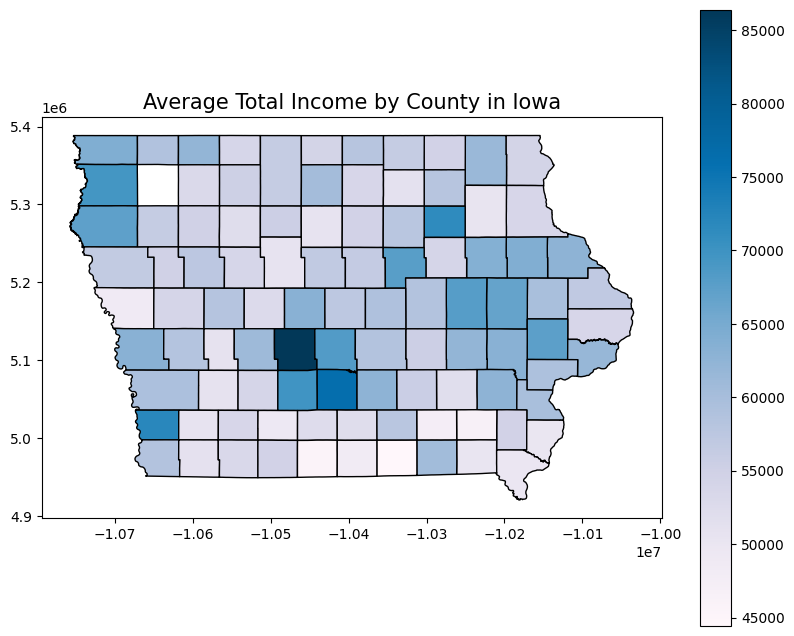

In [51]:
# GEOSPATIAL - average total income
# Group by county and average the income
county_income = df_income.groupby('County')['Average Income ($)'].sum().reset_index()
county_income['County'] = county_income['County'].str.upper().str.strip()

# Merge data and fix values
iowa_income_map = iowa_counties.merge(county_income, left_on='CountyName', right_on='County')
iowa_income_map['Average Income ($)'] = pd.to_numeric(iowa_income_map['Average Income ($)'], errors='coerce')
iowa_income_map['Average Income ($)'] = pd.to_numeric(iowa_income_map['Average Income ($)'], errors='coerce')
iowa_income_map['Average Income ($)'] = iowa_income_map['Average Income ($)'].astype(float)

# Plot data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
iowa_income_map.plot(column='Average Income ($)', ax=ax, legend=True, cmap='PuBu', edgecolor='black')
plt.title('Average Total Income by County in Iowa', fontsize=15)

plt.show()

In [52]:
# Sort the counties by income
sorted_counties = county_income.sort_values(by='Average Income ($)', ascending=False)

# Get the top 2 counties
top_2_counties = sorted_counties.head(2)

# Calculate the middle 2
num_counties = len(sorted_counties)
middle_index = num_counties // 2

if num_counties % 2 == 1:
    middle_2_counties = sorted_counties.iloc[middle_index-1:middle_index+1]
else:
    middle_2_counties = sorted_counties.iloc[middle_index-1:middle_index+1]

# Get the bottom 2 counties
bottom_2_counties = sorted_counties.tail(2)

# Print the results
print("Top 2 counties with the highest income:")
print(top_2_counties)

print("\nMiddle 2 counties' income:")
print(middle_2_counties)

print("\nBottom 2 counties with the lowest income:")
print(bottom_2_counties)


Top 2 counties with the highest income:
    County  Average Income ($)
24  DALLAS             86400.0
90  WARREN             76360.0

Middle 2 counties' income:
      County  Average Income ($)
96  WOODBURY             56632.0
41    HARDIN             56490.0

Bottom 2 counties with the lowest income:
       County  Average Income ($)
26    DECATUR             45652.0
3   APPANOOSE             44440.0


### Alcohol Sales by County


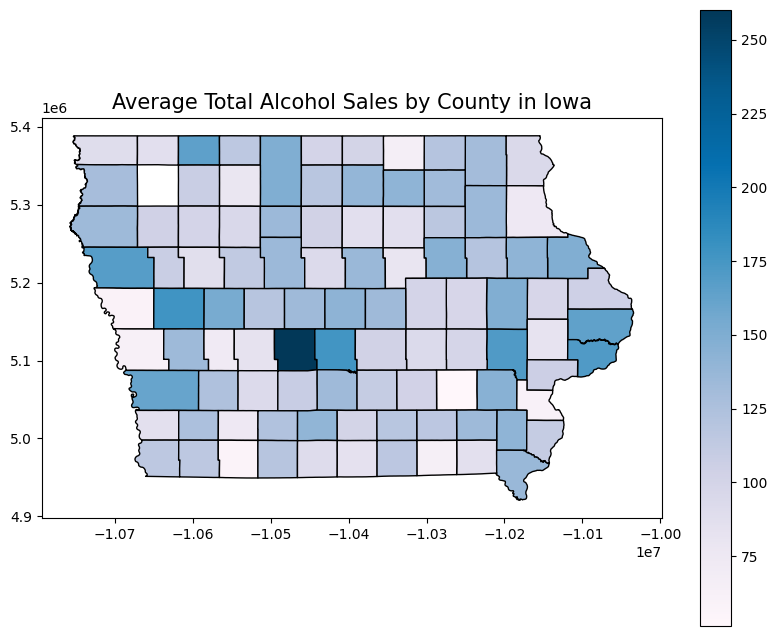

In [53]:
# GEOSPATIAL - average total alcohol sales
# Group by county and average the total sales
county_sales = df_alcohol.groupby('County')['Sale (Dollars)'].mean().reset_index()

# Merge data
iowa_sales_map = iowa_counties.merge(county_sales, left_on='CountyName', right_on='County')

# Plot data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
iowa_sales_map.plot(column='Sale (Dollars)', ax=ax, legend=True, cmap='PuBu', edgecolor='black')
plt.title('Average Total Alcohol Sales by County in Iowa', fontsize=15)

plt.show()

In [54]:
# Sort the counties by sales
sorted_counties = county_sales.sort_values(by='Sale (Dollars)', ascending=False)

# Get the top 2 counties
top_2_counties = sorted_counties.head(2)

# Calculate the middle 2
num_counties = len(sorted_counties)
middle_index = num_counties // 2

if num_counties % 2 == 1:
    middle_2_counties = sorted_counties.iloc[middle_index-1:middle_index+1]
else:
    middle_2_counties = sorted_counties.iloc[middle_index-1:middle_index+1]

# Get the bottom 2 counties
bottom_2_counties = sorted_counties.tail(2)

# Print the results
print("Top 2 counties with the highest average total alcohol sales:")
print(top_2_counties)

print("\nMiddle 2 counties' of average total alcohol sales:")
print(middle_2_counties)

print("\nBottom 2 counties with the lowest average total alcohol sales:")
print(bottom_2_counties)


Top 2 counties with the highest average total alcohol sales:
      County  Sale (Dollars)
24    DALLAS      260.157912
23  CRAWFORD      177.327781

Middle 2 counties' of average total alcohol sales:
     County  Sale (Dollars)
73     PAGE       115.21598
12  CALHOUN       112.78898

Bottom 2 counties with the lowest average total alcohol sales:
     County  Sale (Dollars)
54   KEOKUK       51.352839
31  EL PASO       15.570000


### Volume of Alcohol Sold by County

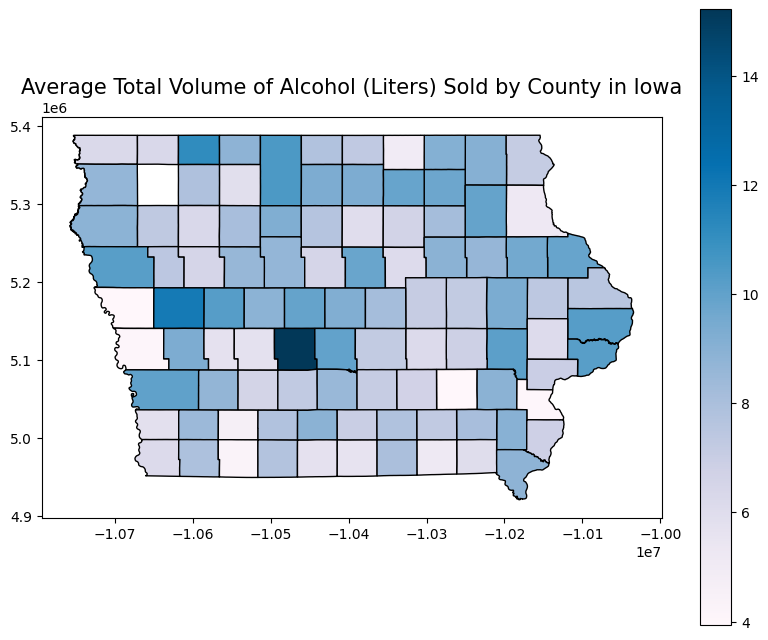

In [55]:
# GEOSPATIAL - average total volume
# Group by county and average volume sold
county_volume = df_alcohol.groupby('County')['Volume Sold (Liters)'].mean().reset_index()

# Merge data
iowa_volume_map = iowa_counties.merge(county_volume, left_on='CountyName', right_on='County')

# Plot data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
iowa_volume_map.plot(column='Volume Sold (Liters)', ax=ax, legend=True, cmap='PuBu', edgecolor='black')
plt.title('Average Total Volume of Alcohol (Liters) Sold by County in Iowa', fontsize=15)

plt.show()

In [56]:
# Sort the counties by sales
sorted_counties = county_volume.sort_values(by='Volume Sold (Liters)', ascending=False)

# Get the top 2 counties
top_2_counties = sorted_counties.head(2)

# Calculate the middle 2
num_counties = len(sorted_counties)
middle_index = num_counties // 2

if num_counties % 2 == 1:
    middle_2_counties = sorted_counties.iloc[middle_index-1:middle_index+1]
else:
    middle_2_counties = sorted_counties.iloc[middle_index-1:middle_index+1]

# Get the bottom 2 counties
bottom_2_counties = sorted_counties.tail(2)

# Print the results
print("Top 2 counties with the highest average total volume of alcohol sold:")
print(top_2_counties)

print("\nMiddle 2 counties' of average total volume of alcohol sold:")
print(middle_2_counties)

print("\nBottom 2 counties with the lowest average total volume of alcohol sold:")
print(bottom_2_counties)


Top 2 counties with the highest average total volume of alcohol sold:
      County  Volume Sold (Liters)
24    DALLAS             15.210346
23  CRAWFORD             11.942997

Middle 2 counties' of average total volume of alcohol sold:
       County  Volume Sold (Liters)
88      UNION              7.802820
95  WINNEBAGO              7.769629

Bottom 2 counties with the lowest average total volume of alcohol sold:
    County  Volume Sold (Liters)
54  KEOKUK              3.937503
67  MONONA              3.927566


# METHODOLOGY

## SUPERVISED LEARNING METHODS - IN SEPERATE FILE


## TIME SERIES ANALYSIS - IN SEPERATE FILE

## UNSUPERVISED LEARNING METHODS

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

In [58]:
from sklearn.cluster import KMeans


In [59]:
df_alcohol_trimmed = df_alcohol[['County', 'Sale (Dollars)', 'Volume Sold (Liters)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Category Name']]
df_income_trimmed = df_income[['County', 'Average Income ($)']]
df_income_trimmed.head()
#Drop null values

df_alcohol_trimmed = df_alcohol_trimmed.dropna()
df_alcohol_trimmed.info()

# Make sure county names are formatted the same
df_income_trimmed['County'] = df_income_trimmed['County'].str.lower()
df_alcohol_trimmed['County'] = df_alcohol_trimmed['County'].str.lower()


<class 'pandas.core.frame.DataFrame'>
Index: 496944 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   County                496944 non-null  object 
 1   Sale (Dollars)        496944 non-null  float64
 2   Volume Sold (Liters)  496944 non-null  float64
 3   State Bottle Cost     496944 non-null  float64
 4   State Bottle Retail   496944 non-null  float64
 5   Bottles Sold          496944 non-null  int64  
 6   Category Name         496944 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 30.3+ MB


/tmp/ipython-input-59-3752241444.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_trimmed['County'] = df_income_trimmed['County'].str.lower()


In [60]:
# Join alcohol sales with income data
df_merged = df_income_trimmed.merge(df_alcohol_trimmed, on='County', how='inner')

# Add revenue from sale feature by subtracting cost from retail
df_merged['Revenue'] = df_merged['Sale (Dollars)'] - df_merged['State Bottle Cost'] * df_merged['Bottles Sold']
df_merged.head()

,County,Average Income ($),Sale (Dollars),Volume Sold (Liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Category Name,Revenue
0,adair,54098.0,135.00,10.50,15.00,22.50,6,CANADIAN WHISKIES,45.00
1,adair,54098.0,20.25,0.75,13.50,20.25,1,IMPORTED DRY GINS,6.75
2,adair,54098.0,99.00,10.50,11.00,16.50,6,CANADIAN WHISKIES,33.00
3,adair,54098.0,70.56,10.50,7.84,11.76,6,WHITE RUM,23.52
4,adair,54098.0,24.12,4.00,3.85,6.03,4,AMERICAN COCKTAILS,8.72


In [61]:
# Scale the data using standard scaler and add it to df_merged
scaler = StandardScaler()
df_merged[['Sale (T)', 'Volume Sold (T)', 'State Bottle Cost (T)', 'State Bottle Retail (T)', 'Bottles Sold (T)', 'Revenue (T)']] = scaler.fit_transform(df_merged[['Sale (Dollars)', 'Volume Sold (Liters)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Revenue']])
df_merged.head()

,County,Average Income ($),Sale (Dollars),Volume Sold (Liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Category Name,Revenue,Sale (T),Volume Sold (T),State Bottle Cost (T),State Bottle Retail (T),Bottles Sold (T),Revenue (T)
0,adair,54098.0,135.00,10.50,15.00,22.50,6,CANADIAN WHISKIES,45.00,-0.022236,0.041533,0.412480,0.411951,-0.172786,-0.022225
1,adair,54098.0,20.25,0.75,13.50,20.25,1,IMPORTED DRY GINS,6.75,-0.268907,-0.245560,0.266546,0.265991,-0.352127,-0.268408
2,adair,54098.0,99.00,10.50,11.00,16.50,6,CANADIAN WHISKIES,33.00,-0.099623,0.041533,0.023322,0.022726,-0.172786,-0.099459
3,adair,54098.0,70.56,10.50,7.84,11.76,6,WHITE RUM,23.52,-0.160758,0.041533,-0.284112,-0.284761,-0.172786,-0.160474
4,adair,54098.0,24.12,4.00,3.85,6.03,4,AMERICAN COCKTAILS,8.72,-0.260588,-0.149862,-0.672297,-0.656471,-0.244522,-0.255729


### Clustering

In [62]:
# Cluster on Revenue and Total Sales

# Find optimal number of clusters using 'Elbow Method' (Got it from youtube channel "Andy McDonald")
def optimize_k_means(data, max_k):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)


    # Generate the elbow plot
    fig = plt.figure(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

##     plt.scatter(df_scaled['Income'], df_scaled['Sale (Dollars)'], c=df_scaled['Cluster'], cmap='viridis')
##     plt.xlabel('Income')
##     plt.ylabel('Sale (Dollars)')
##     plt.title('K-Means Clusters of Counties')
##     plt.show()

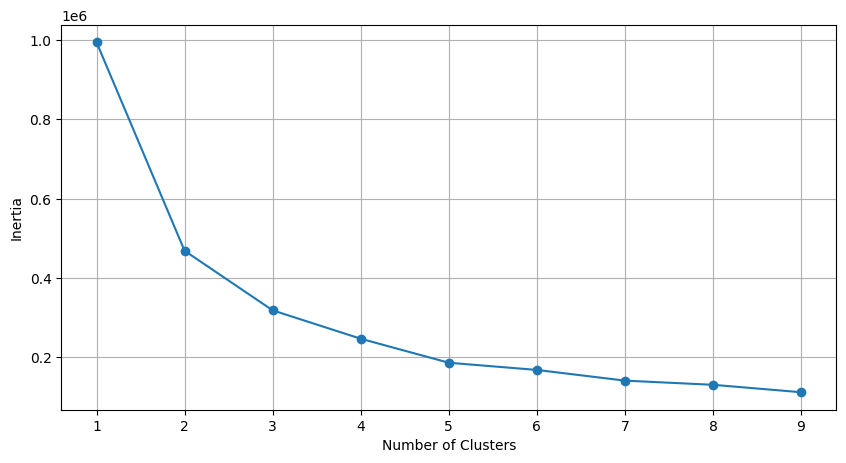

In [63]:
# Run function using 10 clusters
optimize_k_means(df_merged[['Revenue (T)', 'Volume Sold (T)']], 10)

From this chart 5 clusters seem reasonable

In [64]:
# Now run kmeans with 5 clusters
kmeans = KMeans(n_clusters=5)
df_merged['Cluster_5'] = kmeans.fit_predict(df_merged[['Revenue (T)', 'Volume Sold (T)']])
df_merged.head()

,County,Average Income ($),Sale (Dollars),Volume Sold (Liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Category Name,Revenue,Sale (T),Volume Sold (T),State Bottle Cost (T),State Bottle Retail (T),Bottles Sold (T),Revenue (T),Cluster_5
0,adair,54098.0,135.00,10.50,15.00,22.50,6,CANADIAN WHISKIES,45.00,-0.022236,0.041533,0.412480,0.411951,-0.172786,-0.022225,1
1,adair,54098.0,20.25,0.75,13.50,20.25,1,IMPORTED DRY GINS,6.75,-0.268907,-0.245560,0.266546,0.265991,-0.352127,-0.268408,1
2,adair,54098.0,99.00,10.50,11.00,16.50,6,CANADIAN WHISKIES,33.00,-0.099623,0.041533,0.023322,0.022726,-0.172786,-0.099459,1
3,adair,54098.0,70.56,10.50,7.84,11.76,6,WHITE RUM,23.52,-0.160758,0.041533,-0.284112,-0.284761,-0.172786,-0.160474,1
4,adair,54098.0,24.12,4.00,3.85,6.03,4,AMERICAN COCKTAILS,8.72,-0.260588,-0.149862,-0.672297,-0.656471,-0.244522,-0.255729,1


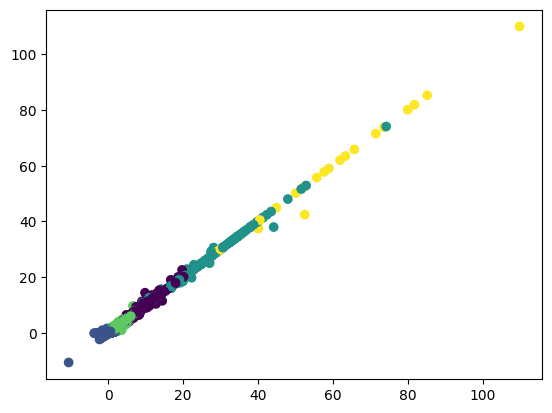

In [65]:
# Plot results
plt.scatter(df_merged['Revenue (T)'], df_merged['Sale (T)'], c=df_merged['Cluster_5'], cmap='viridis')
plt.show()

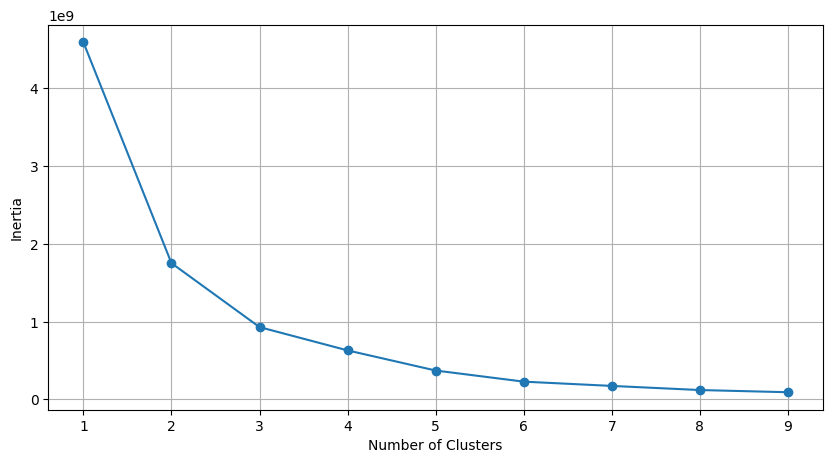

In [68]:
# Now for clusters using income and sales per capita
optimize_k_means(df_merged_income[['Average Income ($)', 'Sales Per Capita']], 10)  #pulled from EDA

In [70]:
# Seems that 5 is the lucky number today
kmeans = KMeans(n_clusters=5)
df_merged_income['Cluster_5_income'] = kmeans.fit_predict(df_merged_income[['Average Income ($)', 'Sales Per Capita']])
df_merged_income.head()

,County,Income: 2018-2022($),Income: 2014-2018($),Income: 2010-2014($),Average Income ($),Sale (Dollars),Average Population,Sales Per Capita,Cluster_5_income
0,adair,63172,51859,47264,54098.0,100061.16,7338.0,13.636026,3
1,adams,64750,49229,47335,53771.0,30519.67,3753.0,8.132073,3
2,allamakee,64049,51057,47886,54331.0,187597.37,14006.0,13.394072,3
3,appanoose,50684,41111,41525,44440.0,201434.89,12487.0,16.131568,0
4,audubon,54973,50397,47556,50975.0,39951.18,5707.0,7.000382,0


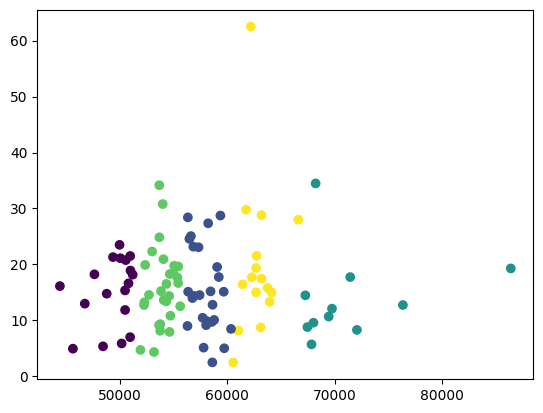

In [71]:
# Plot the results
plt.scatter(df_merged_income['Average Income ($)'], df_merged_income['Sales Per Capita'], c=df_merged_income['Cluster_5_income'], cmap='viridis')
plt.show()

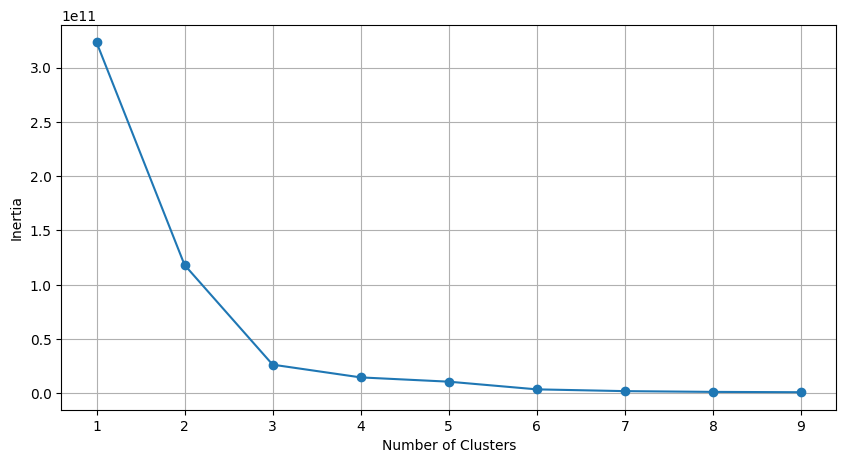

In [72]:
# Lastly let's do a clustering on population and sales per capita
optimize_k_means(df_merged_income[['Average Population', 'Sales Per Capita']], 10)

In [73]:
# It is clear that 3 clusters would be best
kmeans = KMeans(n_clusters=3)
df_merged_income['Cluster_3_pop'] = kmeans.fit_predict(df_merged_income[['Average Population', 'Sales Per Capita']])
df_merged_income.head()

,County,Income: 2018-2022($),Income: 2014-2018($),Income: 2010-2014($),Average Income ($),Sale (Dollars),Average Population,Sales Per Capita,Cluster_5_income,Cluster_3_pop
0,adair,63172,51859,47264,54098.0,100061.16,7338.0,13.636026,3,0
1,adams,64750,49229,47335,53771.0,30519.67,3753.0,8.132073,3,0
2,allamakee,64049,51057,47886,54331.0,187597.37,14006.0,13.394072,3,0
3,appanoose,50684,41111,41525,44440.0,201434.89,12487.0,16.131568,0,0
4,audubon,54973,50397,47556,50975.0,39951.18,5707.0,7.000382,0,0


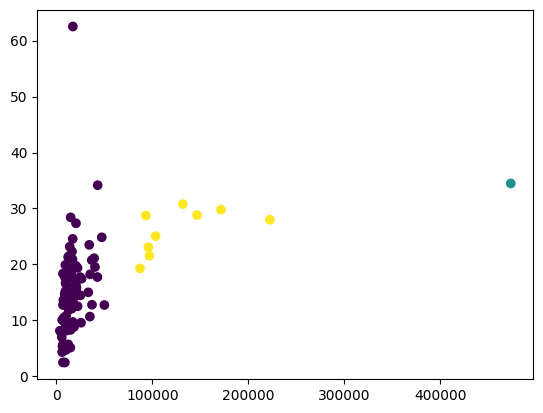

In [74]:
# Plot the clusters
plt.scatter(df_merged_income['Average Population'], df_merged_income['Sales Per Capita'], c=df_merged_income['Cluster_3_pop'], cmap='viridis')

In [75]:
# Export df_merged and df_merged_income csv files for later use
df_merged.to_csv('/content/drive/MyDrive/ASU/DAT 490 Capstone/df_merged.csv', index=False)
df_merged_income.to_csv('/content/drive/MyDrive/ASU/DAT 490 Capstone/df_merged_income.csv', index=False)
